## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)



# Display the data table for preview

In [2]:
mouse_metadata.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [3]:
study_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [4]:
# Display the data table for preview
# Combine the data into a single dataset
grouped_data = pd.merge(mouse_metadata, study_results, on="Mouse ID", how="left")
grouped_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


## Summary Statistics

In [5]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# This method is the most straighforward, creating multiple series and putting them all together at the end.

regimen_grouped = grouped_data.groupby(["Drug Regimen"])
regimen_grouped

#mean
regimen_mean = regimen_grouped["Tumor Volume (mm3)"].mean()

#median
regimen_median = regimen_grouped["Tumor Volume (mm3)"].median()

#variance
regimen_variance = regimen_grouped["Tumor Volume (mm3)"].var()

#standard deviation
regimen_std = regimen_grouped["Tumor Volume (mm3)"].std()

#SEM
regimen_sem = regimen_grouped["Tumor Volume (mm3)"].sem()

#Summary statistics table
regimen_summary = pd.DataFrame({"Mean": regimen_mean,
                               "Median": regimen_median,
                               "VAR": regimen_variance,
                               "STD": regimen_std,
                               "SEM": regimen_sem})
regimen_summary

,Mean,Median,VAR,STD,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

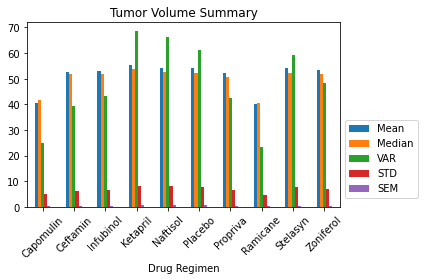

In [6]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 

regimen_summary.plot(kind='bar', figsize=(6,4), rot=45)

#chart Title, x and y labels
plt.title("Tumor Volume Summary")
plt.xlabel("Drug Regimen")
plt.legend(loc='best', bbox_to_anchor=(1.0, 0.5))
plt.tight_layout()
plt.show()

In [7]:
#Group by drug regimen with.count() and mouse id to figure out the data points
regimen_data_points = grouped_data.groupby(["Drug Regimen"]).count()["Mouse ID"]
regimen_data_points

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     161
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Mouse ID, dtype: int64

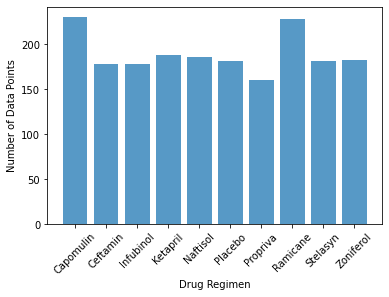

In [8]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
#array with the data points
users = [230, 178, 178, 188, 186, 181, 160, 228, 181, 182]

#set x axis to the amount of theh Data regimen
x_axis = np.arange(len(regimen_data_points))
plt.bar(x_axis, users, alpha=0.75, align='center')

tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol', 'Placebo', 'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol'], rotation=45)

plt.xlabel("Drug Regimen")
plt.ylabel("Number of Data Points")
plt.show()

In [9]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
# plt.pie(counts.values,labels=counts.index.values,autopct='%1.1f%%')


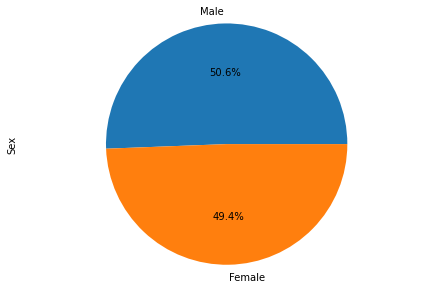

In [10]:
gender_count = grouped_data["Sex"].value_counts()
gender_count.plot(kind='pie', autopct='%1.1f%%')
plt.tight_layout()
plt.axis("equal")
plt.show()

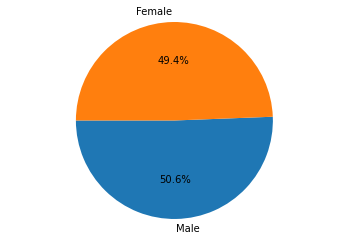

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

plt.pie(gender_count.values, labels = gender_count.index.values, autopct = "%1.1f%%", startangle=180)
plt.axis("equal")
plt.show()

## Quartiles, Outliers and Boxplots

In [12]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
capomulin_df = grouped_data.loc[grouped_data["Drug Regimen"] == "Capomulin",:]
ramicane_df = grouped_data.loc[grouped_data["Drug Regimen"] == "Ramicane",:]
infubinol_df = grouped_data.loc[grouped_data["Drug Regimen"] == "Infubinol",:]
ceftamin_df = grouped_data.loc[grouped_data["Drug Regimen"] == "Ceftamin",:]
capomulin_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0


In [13]:
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
cap_last = capomulin_df.groupby('Mouse ID').max()['Timepoint']
cap_last_vol = pd.DataFrame(cap_last)
cap_last_merge = pd.merge(cap_last_vol, grouped_data, on=("Mouse ID", "Timepoint"), how="left")
cap_last_merge.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,b128,45,Capomulin,Female,9,22,38.982878,2
1,b742,45,Capomulin,Male,7,21,38.939633,0
2,f966,20,Capomulin,Male,16,17,30.485985,0
3,g288,45,Capomulin,Male,3,19,37.074024,1
4,g316,45,Capomulin,Female,22,22,40.159220,2


In [14]:
tumors = cap_last_merge["Tumor Volume (mm3)"]

quartiles = tumors.quantile([.25, .5, .75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Capomulin potential outliers could be values below {lower_bound} and above {upper_bound}.")


Capomulin potential outliers could be values below 20.70456164999999 and above 51.83201549.


In [15]:
#ramicane
ram_last = ramicane_df.groupby('Mouse ID').max()['Timepoint']
ram_last_vol = pd.DataFrame(ram_last)
ram_last_merge = pd.merge(ram_last_vol, grouped_data, on=("Mouse ID", "Timepoint"), how="left")
ram_last_merge.head()
                

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a411,45,Ramicane,Male,3,22,38.407618,1
1,a444,45,Ramicane,Female,10,25,43.047543,0
2,a520,45,Ramicane,Male,13,21,38.810366,1
3,a644,45,Ramicane,Female,7,17,32.978522,1
4,c458,30,Ramicane,Female,23,20,38.342008,2


In [16]:
#ramicane
tumors2 = ram_last_merge["Tumor Volume (mm3)"]

quartiles2 = tumors2.quantile([.25,.5,.75])
lowerq2 = quartiles[0.25]
upperq2 = quartiles2[0.75]
iqr2 = upperq2 - lowerq2

lower_bound2 = lowerq2 - (1.5*iqr2)
upper_bound2 = upperq2 + (1.5*iqr2)
print(f"Ramicane potential outliers could be values below {lower_bound2} and above {upper_bound2}")

Ramicane potential outliers could be values below 19.954882694999995 and above 53.081480415


In [17]:
#infubinol
inf_last = infubinol_df.groupby('Mouse ID').max()['Timepoint']
inf_last_vol = pd.DataFrame(inf_last)
inf_last_merge = pd.merge(inf_last_vol, grouped_data, on=("Mouse ID", "Timepoint"), how="left")
inf_last_merge.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a577,30,Infubinol,Female,6,25,57.031862,2
3,a685,45,Infubinol,Male,8,30,66.083066,3
4,c139,45,Infubinol,Male,11,28,72.226731,2


In [18]:
#infubinol
tumors3 = inf_last_merge["Tumor Volume (mm3)"]

quartiles3 = tumors3.quantile([.25,.5,.75])
lowerq3 = quartiles3[.25]
upperq3 = quartiles3[.75]
iqr3 = upperq3-lowerq3

lower_bound3 = lowerq3 - (1.5*iqr3)
upper_bound3 = upperq3 + (1.5*iqr3)
print(f"Infubinol potential outliers could be values below {lower_bound3} and above {upper_bound3}")


Infubinol potential outliers could be values below 36.83290494999999 and above 82.74144559000001


In [19]:
#ceftamin
ceft_last = ceftamin_df.groupby('Mouse ID').max()['Timepoint']
ceft_last_vol = pd.DataFrame(ceft_last)
ceft_last_merge = pd.merge(ceft_last_vol, grouped_data, on=("Mouse ID", "Timepoint"), how="left")
ceft_last_merge.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a275,45,Ceftamin,Female,20,28,62.999356,3
1,b447,0,Ceftamin,Male,2,30,45.000000,0
2,b487,25,Ceftamin,Female,6,28,56.057749,1
3,b759,30,Ceftamin,Female,12,25,55.742829,1
4,f436,15,Ceftamin,Female,3,25,48.722078,2


In [20]:
#ceftamin
tumors4 = ceft_last_merge["Tumor Volume (mm3)"]

quartiles4 = tumors4.quantile([.25,.5,.75])
lowerq4 = quartiles4[0.25]
upperq4 = quartiles4[0.75]
iqr4 = upperq4-lowerq4

lower_bound4 = lowerq4 - (1.5*iqr4)
upper_bound4 = upperq4 + (1.5*iqr4)
print(f"Ceftamin potential outliers could be values below {lower_bound4} and above {upper_bound4}")


Ceftamin potential outliers could be values below 25.355449580000002 and above 87.66645829999999


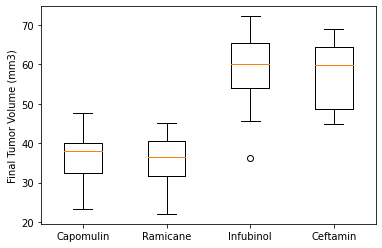

In [21]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
plot_data = [tumors, tumors2, tumors3, tumors4]

fig1, ax1 = plt.subplots()
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.boxplot(plot_data, labels=["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])
plt.show()

## Line and Scatter Plots

In [22]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
line_plot_df = capomulin_df.loc[capomulin_df["Mouse ID"] == "l509",:]
line_plot_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
371,l509,Capomulin,Male,17,21,0,45.000000,0
372,l509,Capomulin,Male,17,21,5,45.851193,0
373,l509,Capomulin,Male,17,21,10,46.759074,0
374,l509,Capomulin,Male,17,21,15,47.488599,1
375,l509,Capomulin,Male,17,21,20,48.070452,2


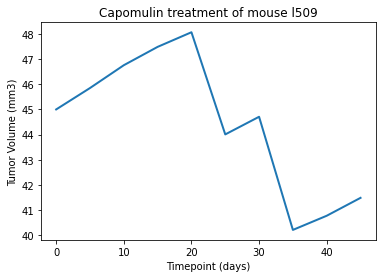

In [23]:
x_axis = line_plot_df["Timepoint"]
tumor_vol = line_plot_df["Tumor Volume (mm3)"]

plt.title("Capomulin treatment of mouse l509")
plt.plot(x_axis, tumor_vol, linewidth=2, markersize=12)
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

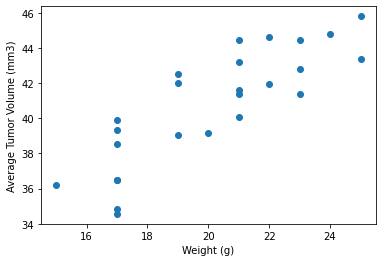

In [24]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
cap_avg = capomulin_df.groupby(["Mouse ID"]).mean()
plt.scatter(cap_avg["Weight (g)"], cap_avg["Tumor Volume (mm3)"])
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()

## Correlation and Regression

In [25]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
corr_coeff = round(st.pearsonr(cap_avg['Weight (g)'], cap_avg['Tumor Volume (mm3)'])[0],2)
print(f"The correlation between mouse weight and the average tumor volume is {corr_coeff}")


The correlation between mouse weight and the average tumor volume is 0.84


In [26]:
model = st.linregress(cap_avg['Weight (g)'], cap_avg['Tumor Volume (mm3)'])
model

LinregressResult(slope=0.9544396890241045, intercept=21.552160532685015, rvalue=0.8419363424694718, pvalue=1.3225722434712642e-07, stderr=0.12754359033201337)

In [27]:
#cap_avg['Weight (g)']
mslope = 0.9544396890241045
bintercept = 21.552160532685015


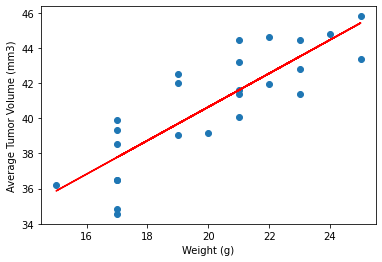

In [28]:
y_values = cap_avg['Weight (g)']*mslope+bintercept
plt.scatter(cap_avg['Weight (g)'], cap_avg['Tumor Volume (mm3)'])
plt.plot(cap_avg['Weight (g)'], y_values, color="red")
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()